In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/content/deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorlfow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit

In [3]:
X,Y=load_coffee_data()
print(X.shape,Y.shape)

(200, 2) (200, 1)


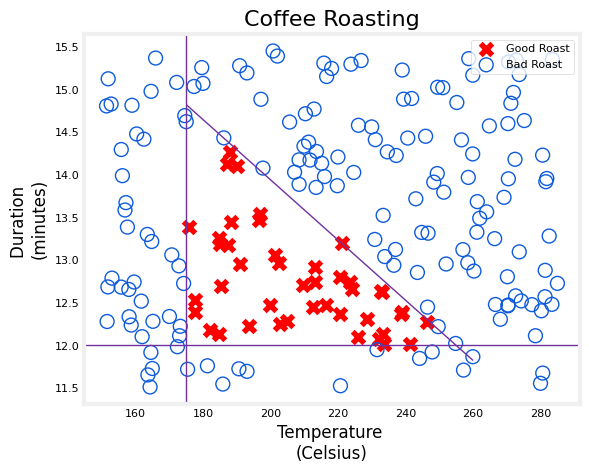

In [4]:
plt_roast(X,Y)

In [5]:
norm= tf.keras.layers.Normalization(axis=-1)
norm.adapt(X)
X_norm=norm(X)

print("max and min pre normalization for feature 1: ", np.max(X[:,0]),",",np.min([X[:,0]]))
print("max and min pre normalization for feature 2:", np.max(X[:,1]),",",np.min(X[:,1]))

print("max and min after normalization for feature 1: ", np.max(X_norm[:,0]),",",np.min([X_norm[:,0]]))
print("max and min after normalization for feature 2:", np.max(X_norm[:,1]),",",np.min(X_norm[:,1]))

max and min pre normalization for feature 1:  284.99434167453603 , 151.32372212128612
max and min pre normalization for feature 2: 15.454206928801511 , 11.512747082472469
max and min after normalization for feature 1:  1.6597537 , -1.6852187
max and min after normalization for feature 2: 1.7932389 , -1.6996713


In [12]:
#increase data points

Xt=np.tile(X_norm,(1000,1))
Yt=np.tile(Y,(1000,1))

print(Xt.shape,Yt.shape)

(200000, 2) (200000, 1)


In [13]:
tf.random.set_seed(1234)
model= Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(units=3,activation='sigmoid',name='layer_1'),
    Dense(units=1, activation='sigmoid',name='layer_2')
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 3)                 9         
                                                                 
 layer_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
W1,b1= model.get_layer('layer_1').get_weights()
W2,b2= model.get_layer('layer_2').get_weights()

print(W1,b1)
print(W2,b2)

[[ 1.05 -0.66  0.43]
 [ 1.08  0.13 -1.03]] [0. 0. 0.]
[[-0.65]
 [-1.02]
 [-0.8 ]] [0.]


In [16]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(Xt,Yt,epochs=10,)

Epoch 1/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.1397
Epoch 2/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0269
Epoch 3/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0145
Epoch 4/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0096
Epoch 5/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0067
Epoch 6/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0048
Epoch 7/10
6250/6250 [==============================] - 9s 2ms/step - loss: 0.0034
Epoch 8/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0025
Epoch 9/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0018
Epoch 10/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.0014


In [19]:
W1,b1=model.get_layer('layer_1').get_weights()
W2,b2=model.get_layer('layer_2').get_weights()

print("w1:",W1,"\n b1:",b1)
print('W2:',W2,'\n b2:',b2)

w1: [[ 14.45 -11.28  -0.15]
 [ 11.98  -0.27  -9.2 ]] 
 b1: [  1.87 -12.27 -11.48]
W2: [[-45.93]
 [-54.81]
 [-50.1 ]] 
 b2: [29.]


In [20]:
X_test=np.array([
    [200,13.0],
    [200,17]
])

X_testn= norm(X_test)
predictions= model.predict(X_testn)
print(predictions)

1/1 [==============================] - 0s 235ms/step
[[1.00e+00]
 [4.32e-08]]


In [21]:
yhat= (predictions>=0.5).astype(int)
print(yhat)

[[1]
 [0]]


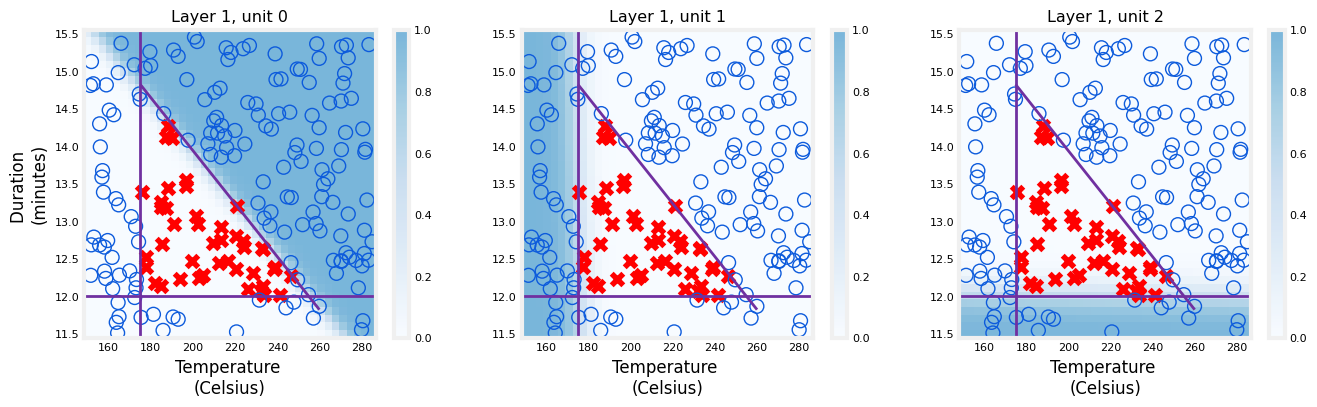

In [23]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm)

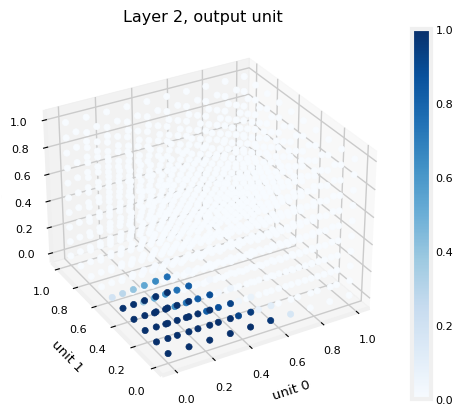

In [24]:
plt_output_unit(W2,b2)